## Go Pokemon! What does the data talk about.

Chia Lin Chiu #47717533

Arham Newaz #

#### Introduction of the data

Like many people’s childhoods, we were all crazy players of Pokémon Go. However, we don't know whether the meaning behind the data is different from our previous perceptions of playing. First of all, there are complete data of the seven generations of pokemon on kaggle(https://www.kaggle.com/rounakbanik/pokemon). There are 801 columns for each Pokemon, and each one is ranged from the against, abilities to speed, blood value, attack power...etc. 





#### Outline

- Trends by each generation
- 
- 
- Final goal:

In [13]:
import os
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import patsy
import sklearn
import seaborn as sns
import math
import scipy.stats as sc
%matplotlib inline

- explain why we add total column（It is also the same as the data of base_total column.）

In [14]:
Pokemon = pd.read_csv("./pokemon.csv") 
# This csv file is origin dataset from Kaggle.

Pokemon["total"] = (Pokemon["sp_attack"] +
                 Pokemon["sp_defense"] +
                 Pokemon["hp"] +
                 Pokemon["speed"]+
                 Pokemon["attack"]+
                 Pokemon["defense"])

#### 1. What are the Pokemon stat differences/ trends from each generation? 

-   Our hypothesis floated in our mind: We think there is a stat “inflation” in each newer generation (newer pokemon genertaion is better than the old pokemon generation). 

   Lets see what is going on ...

In [3]:
Pokemon_generation = Pokemon.set_index(["generation"])
Pokemon_generation
generation=Pokemon_generation[Pokemon_generation.columns[33:39]]
generation

,sp_attack,sp_defense,speed,type1,type2,weight_kg
generation,,,,,,
1,65,65,45,grass,poison,6.9
1,80,80,60,grass,poison,13.0
1,122,120,80,grass,poison,100.0
1,60,50,65,fire,NaN,8.5
1,80,65,80,fire,NaN,19.0
...,...,...,...,...,...,...
7,107,101,61,steel,flying,999.9
7,59,31,109,grass,steel,0.1
7,97,53,43,dark,dragon,888.0


<AxesSubplot:xlabel='generation'>

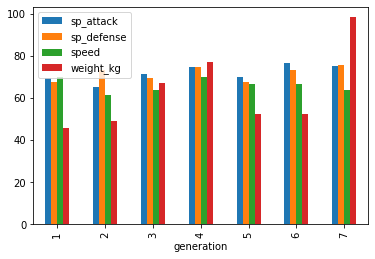

In [5]:
p1=generation.groupby(pd.Grouper(level="generation")).mean()
p1.plot.bar()

<AxesSubplot:xlabel='generation', ylabel='count'>

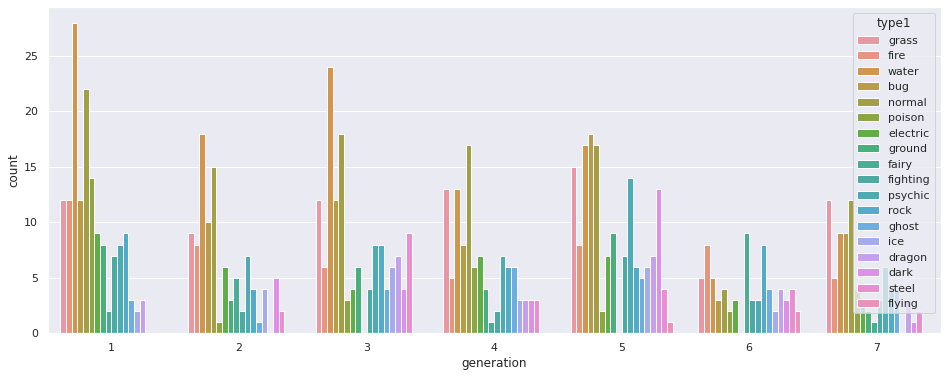

In [6]:
sns.set(font_scale=1)
plt.figure(figsize=(16,6))
sns.countplot(x="generation",hue="type1", data=Pokemon)

In [15]:
# type count
type_gen=generation.groupby("generation")["type1","type2"].count()
type_gen

/tmp/ipykernel_184/752218067.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  type_gen=generation.groupby("generation")["type1","type2"].count()


,type1,type2
generation,,
1,151,81
2,100,49
3,135,66
4,107,54
5,156,75
6,72,41
7,80,51


Explaination(conclusion 1): (editing in progress)

Text(0.5, 1.0, 'type count')

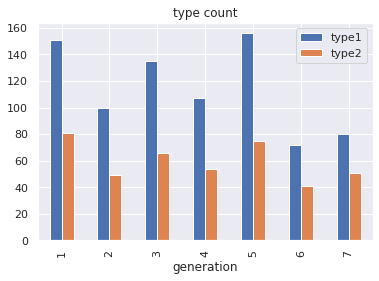

In [17]:
type_gen.plot.bar(subplots=False)
plt.title("type count")

Text(0.5, 1.0, 'box-and-whisker plot')

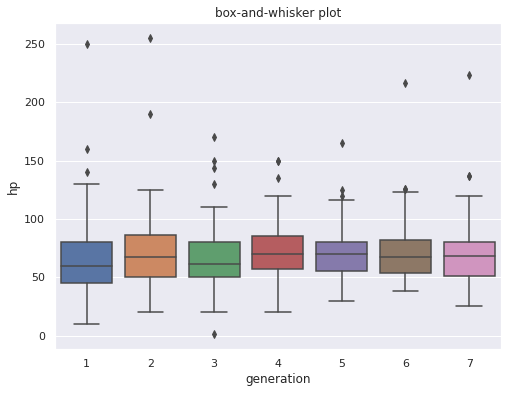

In [24]:
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x='generation', y="hp", data=Pokemon)
plt.title('box-and-whisker plot')

<AxesSubplot:xlabel='generation', ylabel='speed'>

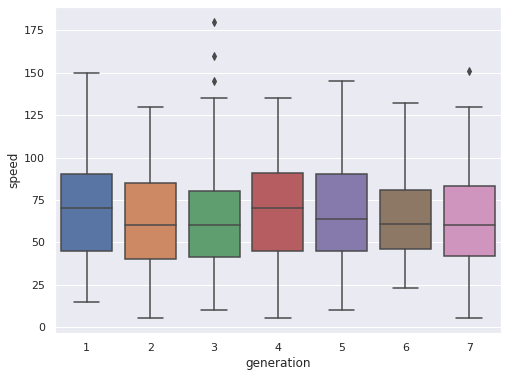

In [22]:
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x='generation', y="speed", data=Pokemon)

2. What are the key differences between a pokemon type and stats? 

   We assumed that Pokemon which has more than one type(own two types) has higher total stats(hp, speed, attack..etc)
   We will attempt to establish a theme of pokemon type and their distribution of stats.

In [18]:
gen1 = Pokemon[Pokemon['generation'] == 1]
gen2 = Pokemon[Pokemon['generation'] == 2]
gen3 = Pokemon[Pokemon['generation'] == 3]
gen4 = Pokemon[Pokemon['generation'] == 4]
gen5 = Pokemon[Pokemon['generation'] == 5]
gen6 = Pokemon[Pokemon['generation'] == 6]
gen7 = Pokemon[Pokemon['generation'] == 7]

In [19]:
ok=Pokemon.fillna(0)
gen1 = ok[ok['generation'] == 1]
#data = gen1.set_index(["type1"])
#Pokemon_type1=pd.DataFrame(data)


onlytype1=gen1[gen1['type2'] == 0]

onlytype2=gen1[gen1['type2'] != 0]

print(onlytype1.total.describe())
print(onlytype2.total.describe())
#------- Gen 2 

gen2 = ok[ok['generation'] == 2]
data = gen2.set_index(["type1"])
Pokemon_type1=pd.DataFrame(data)


onlytype1for2=gen2[gen2['type2'] == 0]

onlytype2for2=gen2[gen2['type2'] != 0]

print(onlytype1for2.total.describe())
print(onlytype2for2.total.describe())

count     70.000000
mean     407.600000
std      113.019865
min      195.000000
25%      320.000000
50%      402.500000
75%      490.000000
max      780.000000
Name: total, dtype: float64
count     81.000000
mean     423.728395
std      111.784280
min      195.000000
25%      325.000000
50%      435.000000
75%      500.000000
max      640.000000
Name: total, dtype: float64
count     51.000000
mean     400.470588
std      115.588988
min      180.000000
25%      311.500000
50%      405.000000
75%      500.000000
max      610.000000
Name: total, dtype: float64
count     49.000000
mean     426.408163
std      125.741620
min      210.000000
25%      330.000000
50%      430.000000
75%      485.000000
max      700.000000
Name: total, dtype: float64


In [20]:
edata=generation.fillna(0)
allgentype1=edata[edata['type2'] == 0]
allgentype2= edata[edata['type2'] != 0]

print(allgentype2.total.describe())
print(allgentype1.total.describe())
print(edata.total.describe())

AttributeError: 'DataFrame' object has no attribute 'total'

Text(0, 0.5, 'total values')

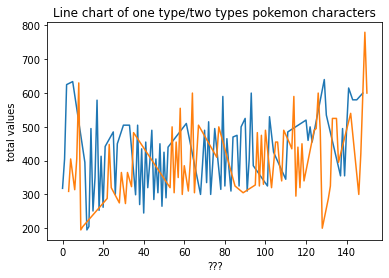

In [59]:
#plot pie(or Line) chart of the only one type
onlytype2.total.plot()
onlytype1.total.plot()

plt.title('Line chart of one type/two types pokemon characters')
plt.xlabel('???')
plt.ylabel('total values')
 

In [37]:
#then compare 
print(sc.stats.ttest_ind(onlytype1.total,onlytype2.total))
sc.stats.ttest_ind(allgentype1.total,allgentype2.total)

Ttest_indResult(statistic=-0.8796089051707912, pvalue=0.38048763695778676)


Ttest_indResult(statistic=-4.383170789740527, pvalue=1.3258212170067869e-05)

3. Linear model with different stats to do projection of same function (eg. we choose attack/defense) 

   Now we already figured out how the types affect Pokemon performance in each generation. 
   We try to predict the eighth generation (already exist tho) whether their percentage of attack increase.

In [12]:

df1=pd.DataFrame(Pokemon).fillna(0)

df1

X_L = df1.drop(columns=['pokedex_number','name','type1', 'type2','is_legendary','abilities','against_bug','against_dark','against_dragon',	'against_electric',	'against_fairy',	'against_fight',	'against_fire',	'against_flying',	'against_ghost','generation','japanese_name','against_grass',	'against_ground',	'against_ice',	'against_normal',	'against_poison',	'against_psychic',	'against_rock',	'against_steel'
, 'against_water','base_egg_steps','base_happiness','capture_rate','experience_growth','percentage_male','classfication','total'])
Y_L = df1["is_legendary"]

from sklearn.model_selection import train_test_split

#Train test split 
X_train, X_test, y_train,y_test = train_test_split(X_L.values,Y_L.values)
print("Successful Split")

from sklearn.ensemble import RandomForestClassifier as RF
#Create Model 

clf = RF(bootstrap=True)
clf.fit(X_train,y_train)

clf.score(X_test,y_test)

clf.predict(np.array([[120,600,75,3,88,100,75,142,50]]))[0] == 1


Successful Split


True

In [8]:
# Before predicting, lets see what's the relationship between attack% and generation
# calculate the percentage distribution (ex: sp_attack/total) for each generation 

#adding a new column called "total"

In [8]:
# use simple linear regression to predict the eight gen

from sklearn import (
    linear_model, metrics, neural_network, pipeline, model_selection
)

Pokemon[["name","sp_attack","sp_defense","total"]].head()


,name,sp_attack,sp_defense,total
0,Bulbasaur,65,65,318
1,Ivysaur,80,80,405
2,Venusaur,122,120,625
3,Charmander,60,50,309
4,Charmeleon,80,65,405


In [ ]:
# web scrap and create the 8th generation dataset + explain



In [ ]:
# compare our linear regression outcome and the actual outcome. Ex: Lasso regression is more accurate(?

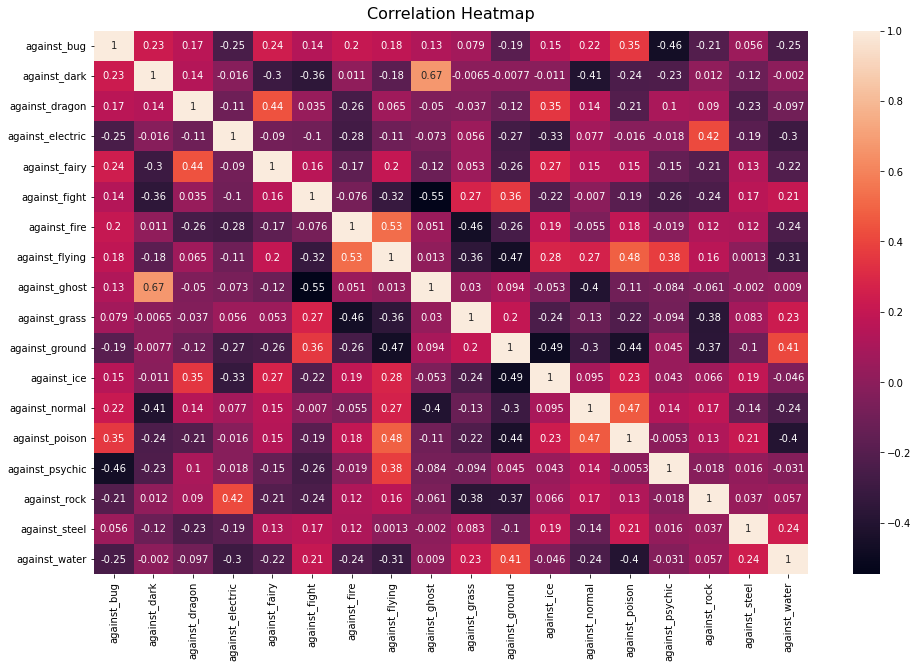

In [44]:
#heatmap of against ability

#18 features in total, 
plt.figure(figsize=(16, 10))
against=Pokemon.iloc[:,1:19]
sns.heatmap(against.corr(),annot=True)

plt.title('Correlation Heatmap', fontdict={'fontsize':16}, pad=12);


### Linear regression (need some edit.... )

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = Pokemon.iloc[:, 33].values.reshape(-1,1) #sp_attack
y = Pokemon.iloc[:,34].values #sp_defense

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

w_0 = regressor.intercept_
w_1 = regressor.coef_
print('Interception : ', w_0)
print('Coeficient : ', w_1)


# sp_defense = 0.45* sp_attack + 38.65 

Interception :  38.65466117361639
Coeficient :  [0.45199567]


In [33]:
score = regressor.score(X_test, y_test)
print('Score: ', score)
print('Accuracy: ' + str(score*100) + '%')

Score:  0.24156740355004558
Accuracy: 24.15674035500456%


In [34]:
y_pred = regressor.predict(X_test)
print('Predict : ', y_pred)

Predict :  [ 99.67407602 104.19403268  58.99446612  95.15411937  45.43459616
  45.43459616  74.81431442  79.33427107 110.97396766  74.81431442
  97.4140977   56.7344878   56.7344878   68.03437943  74.81431442
  49.95455281  66.22639677  83.85422773  71.19834909  77.97828408
  83.85422773  65.77440111  73.91032309  72.55433609  99.67407602
  65.77440111  72.55433609  74.81431442  63.51442278  86.11420606
  61.25444445  54.47450947  92.89414104  70.29435776  49.95455281
  54.92650513  56.7344878   81.5942494   83.85422773  89.27817572
  65.32240544  88.37418438  77.97828408  52.21453114  74.81431442
  90.63416271  68.03437943  56.7344878   65.77440111  80.2382624
  86.11420606  81.5942494   77.07429275  63.51442278  54.47450947
  56.7344878   83.85422773  79.33427107  63.06242711  68.03437943
  95.15411937  65.77440111  92.89414104  56.7344878   79.33427107
  49.95455281  61.25444445  77.07429275  63.51442278  54.47450947
  63.51442278  63.96641844  81.5942494   58.99446612  74.81431442


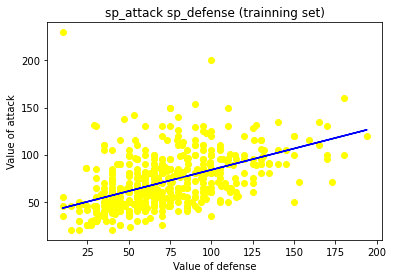

In [39]:
plt.scatter(X_train, y_train, color = 'yellow')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('sp_attack sp_defense (trainning set)')
plt.xlabel("Value of defense") # im not sure
plt.ylabel("Value of attack") #
plt.show()

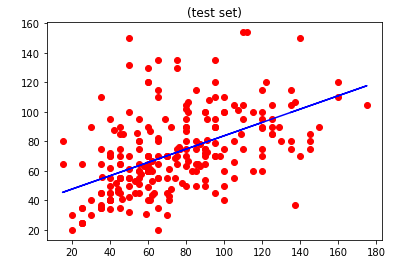

In [37]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_test, regressor.predict(X_test), color = 'blue')
plt.title('(test set)')
plt.xlabel(" ")
plt.ylabel(" ")
plt.show()

In [6]:
#correlation of hp and speed.


print(gen1['hp'].corr(gen1['speed']))
print(gen2['hp'].corr(gen2['speed']))
print(gen3['hp'].corr(gen3['speed']))
print(gen4['hp'].corr(gen4['speed']))
print(gen5['hp'].corr(gen5['speed']))
print(gen6['hp'].corr(gen6['speed']))
print(gen7['hp'].corr(gen7['speed']))



-0.02315482771461441
0.15490296843431908
0.25394253674073497
0.2239174624871413
0.22416564097386785
0.29043893041413577
0.1494638897212455


# lasso ?

In [21]:
#lasso(base_total, speed, hp)

cols_selected = ['base_total', 'speed','hp']
Pokemon[cols_selected].head()


,base_total,speed,hp
0,318,45,45
1,405,60,60
2,625,80,80
3,309,65,39
4,405,80,58


In [23]:
X = Pokemon[cols_selected].iloc[:,0:2].values # features matrix 
y = Pokemon[cols_selected]['speed'].values 

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, y, 
                                      test_size=0.4, random_state=0)

In [25]:
from sklearn.preprocessing import StandardScaler

sc_y = StandardScaler()
sc_x = StandardScaler()
y_std = sc_y.fit_transform(y_train[:, np.newaxis]).flatten()
X_train_std = sc_x.fit_transform(X_train)
X_test_std = sc_x.transform(X_test)
y_train_std = sc_y.fit_transform(y_train[:, np.newaxis]).flatten()


In [26]:
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score

alpha = np.linspace(0.01,0.4,10)
r2_train =[]
r2_test =[]
norm = []
alpha = np.linspace(0.01,0.4,10)
for i in range(10):
    lasso = Lasso(alpha = alpha[i])
    lasso.fit(X_train_std,y_train_std)
    y_train_std = lasso.predict(X_train_std)
    y_test_std = lasso.predict(X_test_std)
    r2_train = np.append(r2_train,
              r2_score(y_train,sc_y.inverse_transform(y_train_std)))
    r2_test = np.append(r2_test,
              r2_score(y_test,sc_y.inverse_transform(y_test_std)))
    norm = np.append(norm,np.linalg.norm(lasso.coef_))

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent(


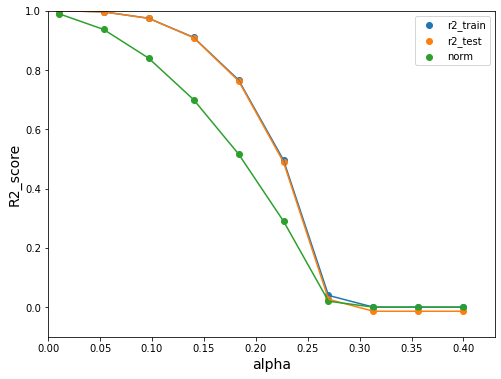

In [27]:
plt.figure(figsize=(8,6))
plt.scatter(alpha,r2_train,label='r2_train')
plt.plot(alpha,r2_train)
plt.scatter(alpha,r2_test,label='r2_test')
plt.plot(alpha,r2_test)
plt.scatter(alpha,norm,label = 'normal')
plt.plot(alpha,norm)
plt.ylim(-0.1,1)
plt.xlim(0,.43)
plt.xlabel('alpha', size = 14)
plt.ylabel('R2_score',size = 14)
plt.legend()
plt.show()

We observed that as the regularization parameter alpha increases, the norm of the regression coefficient becomes smaller and smaller. This means that more regression coefficients are forced to zero, which increases the bias (oversimplification of the model). When α is kept low, it is the best balance between deviation and variance.

### plot

In [52]:
# utility curve for base_total  and capture rate (should be negative)


In [76]:
# use multiple regression to predict the ['speed'] value of the 8th generation

from sklearn import linear_model

features = ['sp_attack','sp_defense','hp','attack','defense']
target = 'speed'

X = Pokemon[features].values.reshape(-1, len(features))
y = Pokemon[target].values

ols = linear_model.LinearRegression()
model = ols.fit(X, y)
model.coef_
model.intercept_
model.score(X, y)

#sp_attack =  65
#sp_defense = 65
#hp = 45
#speed = 45
#attack = 49
#defense= 49

x_pred = np.array([40, 30, 28, 60, 30])
x_pred = x_pred.reshape(-1, len(features))
model.predict(x_pred)

array([61.16098212])

## dec17

NameError: name 'df' is not defined

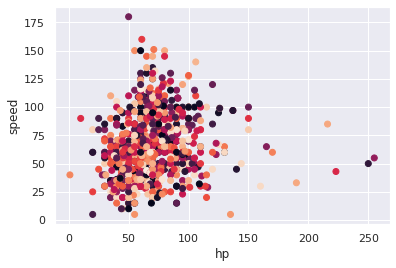

In [34]:
from sklearn import datasets

#df = Pokemon.DataFrame(data, columns = ['hp', 'speed', 'weight_kg'])
import random
#r = random.random()
#b = random.random()
#g = random.random()
colors = np.random.rand(801)

fig, ax = plt.subplots()
ax.scatter(x=Pokemon['hp'],y=Pokemon['speed'],c=colors, )
ax.set_xlabel('hp')
ax.set_ylabel('speed')

for idx, row in df.iterrows():
    ax.annotate(row['weight_kg'], (row['Age'], row['speed']) )
plt.show()


### radar chart

In [33]:
pip install soccerplots

Note: you may need to restart the kernel to use updated packages.


In [34]:
#pip install soccerplots
from soccerplots.radar_chart import Radar

temp=['name','sp_attack','sp_defense','attack','defense','hp','speed',]

for i in range(len(temp)):
    df=Pokemon[temp]

df=df[(df['name']=='Pikachu')|(df['name']=='Hypno')].reset_index()
df=df.drop(['index'],axis=1)
params=list(df.columns)
params=params[1:]
ranges=[]
a_value=[]
b_value=[] #create an empty list

for x in params:
    a=min(df[params][x])
    a=a-(a*0.25)
    
    b=max(df[params][x])
    b=b+(b*0.25)
    
    ranges.append((a,b))
    
for x in range(len(df['name'])):
    if df['name'][x]=='Pikachu':        
        a_values=df.iloc[x].values.tolist()
    if df['name'][x]=='Hypno':      
        b_values=df.iloc[x].values.tolist()
        
a_values=a_values[1:]
b_values=b_values[1:]

values=[a_values,b_values]

In [35]:
title=dict(
    title_name='Pikachu',
    title_color='red',
    subtitle_name='type',
    subtitle_clor='red',
    title_name_2='Hypno',
    title_color_2='blue',
    subtitle_name_2='type',
    subtitle_clor_2='blue',
    title_fontsize=18,
    subtitle_fontsize=15   
)
endnote='endnote'

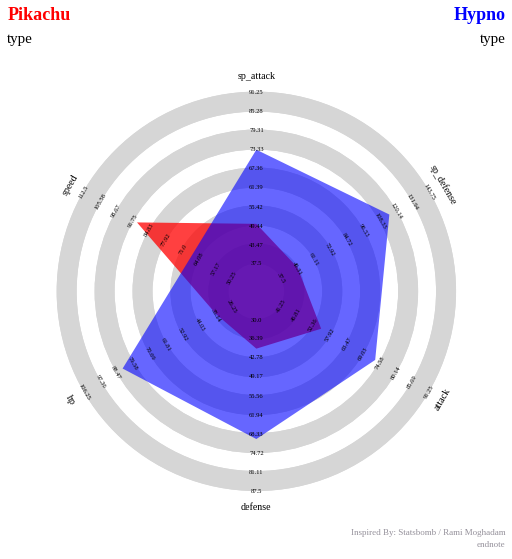

In [37]:
radar=Radar()
fig, ax=radar.plot_radar(ranges=ranges, params=params,values=values, 
                        radar_color=['red','blue'],
                         alphas=[0.75,0.6], title=title, endnote=endnote,
                         compare=True)